# Looking at COVID 19 Data

## Vaccine Data + Case Data

https://github.com/owid/covid-19-data

## Vaccine Tweet Data

https://www.kaggle.com/kaushiksuresh147/covidvaccine-tweets

## Vaccine Adverse Reaction Data

https://www.kaggle.com/ayushggarg/covid19-vaccine-adverse-reactions

## Weather Data

https://github.com/fivethirtyeight/data.git 

File Key:
- KCQT - Los Angeles
- KCLT - Charlotte
- KHOU - Houston
- KIND - Indianapolis
- KJAX - Jacksonville
- KMDW - Chicago
- KNYC - New York
- KPHL - Philadelphia
- KPHX - Phoenix
- KSEA - Seattle

## State Level Data

https://github.com/nytimes/covid-19-data/blob/master/live/us-states.csv

## Data Exploration

In [1]:
import pandas as pd

In [2]:
vac_tweets = pd.read_csv('../COVID_data/vaccine_tweets/covidvaccine_tweets.csv')

C:\Users\mitch\Anaconda3\envs\data_eng\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
vac_tweets.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,False
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,False
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False


In [5]:
vac_tweets.shape

(161251, 13)

## Look at distribution of text length

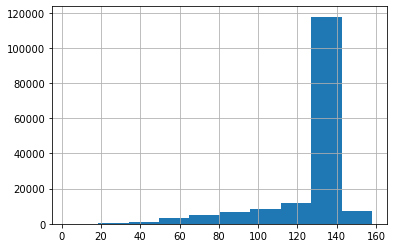

In [8]:
vac_tweets['text'].astype(str).apply(lambda x: len(x)).hist()

## Distribution of hash tags

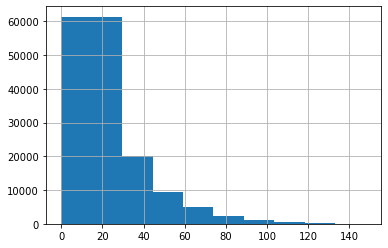

In [11]:
import numpy as np
vac_tweets['hashtags'].apply(lambda x: len(x) if x is not np.nan else 0).hist()

## Where are our users tweeting from?

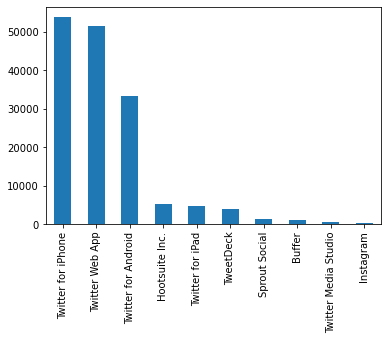

In [17]:
vac_tweets['source'].value_counts()[:10].plot.bar()

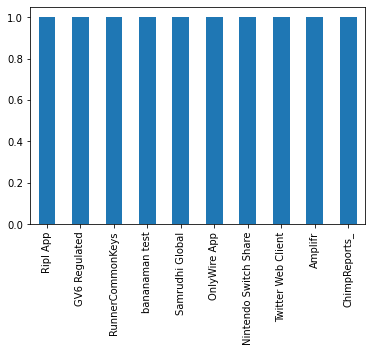

In [19]:
vac_tweets['source'].value_counts()[-10:].plot.bar()

## Vaccine response data

In [21]:
import chardet    
rawdata = open('../COVID_data/vaccine_response_data/2021VAERSDATA.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

Windows-1252


In [22]:
vaers_data = pd.read_csv('../COVID_data/vaccine_response_data/2021VAERSDATA.csv', encoding=charenc)

In [23]:
vaers_data

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916710,01/01/2021,MO,23.0,23.0,NaN,F,NaN,"Acute appendicitis, onset morning of 1/1/2021 ...",NaN,...,NaN,Hypothyroidism,NaN,NaN,2,01/01/2021,NaN,NaN,Y,NKDA
1,916720,01/01/2021,NY,23.0,23.0,NaN,M,NaN,Patient made statements that he was having a h...,NaN,...,NaN,NaN,unknown,NaN,2,01/01/2021,NaN,NaN,Y,NaN
2,916741,01/01/2021,AR,68.0,68.0,NaN,F,NaN,"on dec 22 I felt some myalgias, chills, fatigu...",NaN,...,had surgery R hand for advanced arthritis 11/1...,Rheumatoid arthritis - mostly affecting R wris...,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,bee stings
3,916772,01/01/2021,GA,55.0,55.0,NaN,M,NaN,Vaccine on 12/22/2020 and started feeling bad ...,NaN,...,NaN,"HTN, Insomnia,High Cholesterol,",NaN,NaN,2,01/01/2021,NaN,Y,NaN,Codeine
4,916790,01/01/2021,TN,52.0,52.0,NaN,F,NaN,"Flushing, sweating, increased heart rate proce...",NaN,...,NaN,"Asthma, migraines",NaN,NaN,2,01/01/2021,NaN,NaN,Y,"Sulfa, shellfish"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5346,1024788,02/11/2021,MO,90.0,90.0,NaN,F,NaN,Pt had passed away before second dose given.,Y,...,NaN,NaN,NaN,NaN,2,02/11/2021,NaN,NaN,NaN,NaN
5347,1024790,02/11/2021,MO,91.0,91.0,NaN,F,NaN,Pt had passed away before second dose given.,Y,...,NaN,NaN,NaN,NaN,2,02/11/2021,NaN,NaN,NaN,NaN
5348,1024795,02/11/2021,MO,86.0,86.0,NaN,F,NaN,Pt had passed away before second dose given.,Y,...,NaN,NaN,NaN,NaN,2,02/11/2021,NaN,NaN,NaN,NaN
5349,1024817,02/11/2021,GU,68.0,68.0,NaN,M,NaN,Patient was coded and expired Code Blue: Pati...,Y,...,"NIDDM, HTN, CAD s/p CABG x4v, liver cirrhosis,...",social history of alcohol abuse,NaN,NaN,2,02/11/2021,NaN,NaN,NaN,Ampicillin sodium


In [38]:
vaers_data['HISTORY'].value_counts()[:5]

None                                                                                              242
Comments: List of non-encoded Patient Relevant History: Patient Other Relevant History 1: None    200
none                                                                                              109
Comments: List of non-encoded Patient Relevant History: Patient Other Relevant History 1: none     40
Asthma                                                                                             32
Name: HISTORY, dtype: int64

In [40]:
vaers_data['STATE'].value_counts()[:10]

CA    401
FL    327
NY    287
TX    270
PA    176
MA    169
MI    163
OH    151
IL    148
NC    147
Name: STATE, dtype: int64

In [44]:
vaers_data['AGE_YRS'].value_counts()

50.00    89
39.00    85
40.00    84
65.00    78
58.00    78
         ..
0.33      1
9.00      1
11.00     1
7.00      1
0.58      1
Name: AGE_YRS, Length: 99, dtype: int64

In [45]:
vaers_data['SEX'].value_counts()

F    3358
M    1681
U     312
Name: SEX, dtype: int64

In [47]:
vaers_data['DIED'].value_counts() /vaers_data.shape[0]

Y    0.151374
Name: DIED, dtype: float64

In [51]:
vaers_data['ALLERGIES'].astype(str).apply(lambda x: x.split(',')).explode().value_counts()[:10]

nan                   2872
None                   315
none                   161
NKA                    132
NKDA                   122
Penicillin              58
No known allergies      51
No                      35
unknown                 33
PCN                     33
Name: ALLERGIES, dtype: int64

In [24]:
vaers_symps_data = pd.read_csv('../COVID_data/vaccine_response_data/2021VAERSSYMPTOMS.csv', encoding=charenc)

In [25]:
vaers_symps_data

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,916710,Appendicitis,23.1,Band neutrophil percentage increased,23.1,Surgery,23.1,White blood cell count increased,23.1,NaN,NaN
1,916720,Dysphagia,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN
2,916741,Chills,23.1,Complex regional pain syndrome,23.1,Fatigue,23.1,Headache,23.1,Joint range of motion decreased,23.1
3,916741,Myalgia,23.1,Pain in extremity,23.1,Peripheral swelling,23.1,X-ray abnormal,23.1,NaN,NaN
4,916772,Feeling abnormal,23.1,SARS-CoV-2 test positive,23.1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8635,1024817,Aspiration,23.1,Blood pressure systolic decreased,23.1,Cardio-respiratory arrest,23.1,Death,23.1,Dialysis,23.1
8636,1024817,Endotracheal intubation,23.1,Gastrointestinal haemorrhage,23.1,Mechanical ventilation,23.1,Pulse absent,23.1,Pulseless electrical activity,23.1
8637,1024817,Respiratory arrest,23.1,Resuscitation,23.1,Seizure like phenomena,23.1,Unresponsive to stimuli,23.1,Ventricular fibrillation,23.1
8638,1024853,Abdominal pain upper,23.1,Aspiration,23.1,Death,23.1,Fatigue,23.1,Haemorrhage,23.1


In [26]:
vaers_vax_data = pd.read_csv('../COVID_data/vaccine_response_data/2021VAERSVAX.csv', encoding=charenc) 

In [28]:
vaers_vax_data['VAX_NAME'].value_counts()

COVID19 (COVID19 (PFIZER-BIONTECH))                      3517
COVID19 (COVID19 (MODERNA))                              1747
ZOSTER (SHINGRIX)                                          29
VACCINE NOT SPECIFIED (NO BRAND NAME)                      29
ZOSTER LIVE (ZOSTAVAX)                                     24
INFLUENZA (SEASONAL) (NO BRAND NAME)                       18
COVID19 (COVID19 (UNKNOWN))                                15
PNEUMO (PNEUMOVAX)                                         12
INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT)                10
INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE QUADRIVALENT)       9
MEASLES + MUMPS + RUBELLA (MMR II)                          6
PNEUMO (PREVNAR13)                                          4
INFLUENZA (SEASONAL) (AFLURIA QUADRIVALENT)                 4
INFLUENZA (SEASONAL) (FLUBLOK QUADRIVALENT)                 4
VARICELLA (VARIVAX)                                         3
HEP B (ENGERIX-B)                                           3
TDAP (AD

In [31]:
vaers_vax_data['VAX_SITE'].value_counts()

LA    2389
RA     931
AR     134
UN     128
LL      11
RL       7
LG       5
OT       3
Name: VAX_SITE, dtype: int64

In [33]:
vaers_vax_data['VAX_DOSE_SERIES'].value_counts()

1      3538
UNK    1027
2       880
3         5
7+        5
4         4
5         2
6         1
Name: VAX_DOSE_SERIES, dtype: int64

In [34]:
vaers_vax_data['VAX_LOT'].value_counts()

EK9231       187
EH9899       171
EK5730       163
EL1284       135
EJ1685       124
            ... 
OFAA2017       1
PF EL3249      1
01122019       1
04LLZOA        1
GL3248         1
Name: VAX_LOT, Length: 491, dtype: int64

## COVID By State

In [57]:
covid_state = pd.read_csv('../COVID_data/nyt_covid_data/us-states.csv')

In [60]:
covid_state.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [61]:
covid_state.shape

(21354, 5)

In [64]:
import altair as alt
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [79]:
bottom_10 = covid_state.groupby('state')['cases'].max().sort_values()[:10].index

In [82]:
top_10 = covid_state.groupby('state')['cases'].max().sort_values(ascending=False)[:10].index

In [83]:
alt.Chart(covid_state[covid_state['state'].isin(bottom_10)]).mark_line().encode(
    x='yearmonth(date):T',
    y='cases',
    row='state'
)

alt.Chart(...)

In [84]:
alt.Chart(covid_state[covid_state['state'].isin(top_10)]).mark_line().encode(
    x='yearmonth(date):T',
    y='cases',
    row='state'
)

alt.Chart(...)